# Merge Sort 합병 정렬 - 안정정렬
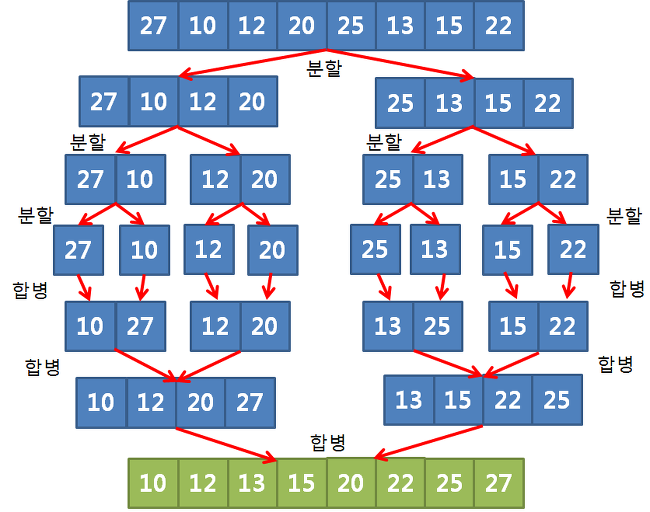
-출처 : 'https://wonjayk.tistory.com/221'

### 1개 남을때 까지 나눠서 각각에 대해서 정렬하면서 합친다.

## Merge Sort

In [3]:
def mergesort(lst):
    n = len(lst)
    if (n <= 1):
        return lst
    else:
        mid = n//2
        lst_l = mergesort(lst[0:mid])
        lst_r = mergesort(lst[mid:n])
        return merge(lst_l,lst_r)

## Optimizer Merge Sort

In [22]:
def mergesort2(lst,low,high): # 우측,좌측에 새로운 리스트에 저장하는게 아닌 본인 리스트를 이용해서 메모리를 효율적으로 써보자.
    if (low < high):
        mid = (low + high) // 2
        mergesort2(lst,low,mid)
        mergesort2(lst,mid + 1,high)
        merge2(lst,low,mid,high)

## Merge

In [7]:
def merge(left,rigt):
    s = []
    i =j = 0
    while (i < len(left) and j < len(right)):
        if (left[i] < right[j]):
            s.append(left[i])
            i += 1
        else:
            s.append(right[j])
            j += 1
    
    if (i < len(left)):
        s += left[i:len(left)]
    else:
        s += right[j:len(right)]
    return s

## Optimizer Merge

In [46]:
def mergesort2(lst,low,high): # 우측,좌측에 새로운 리스트에 저장하는게 아닌 본인 리스트를 이용해서 메모리를 효율적으로 써보자.
    if (low < high):
        mid = (low + high) // 2
        mergesort2(lst,low,mid)
        mergesort2(lst,mid + 1,high)
        merge2(lst,low,mid,high)
        
def merge2(lst,low,mid,high):
    new = []
    i = low
    j = mid + 1
    while (i <= mid) and (j <= high):
        if (lst[i] <= lst[j]):
            new.append(lst[i])
            i += 1
        else:
            new.append(lst[j])
            j += 1
    if i <= mid :
        new.extend(lst[i : mid + 1])
    else:
        new.extend(lst[j : high + 1])
    
    print(f'low : {low}, high : {high}\n')
    for k in range(low, high+1):
        lst[k] = new[k - low]
#         print(f'k : {k}, low : {low}')
    print(lst)

## 리스트에서 + 와 extend 의 차이

### 덧셈 연산

In [38]:
s = [1,2,3,4,5]
print(f's : {s}\n id : {id(s)}')

s = s+[6,7]
print(f's : {s}\n id : {id(s)}')

s = [1,2,3,4,5]
print(f's : {s}\n id : {id(s)}')
s.append(6)
print(f's : {s}\n id : {id(s)}')

s : [1, 2, 3, 4, 5]
 id : 4628590976
s : [1, 2, 3, 4, 5, 6, 7]
 id : 4628599488
s : [1, 2, 3, 4, 5]
 id : 4628419840
s : [1, 2, 3, 4, 5, 6]
 id : 4628419840


#### + 의 경우 새로운 리스트가 반환된다.( 주소 값이 달라짐 )

### Extend

In [14]:
s = [1,2,3,4,5]
print(f's : {s}\n id:{id(s)}')

s.extend([6,7])
print(f's : {s}\n id:{id(s)}')


s : [1, 2, 3, 4, 5]
 id:4626721152
s : [1, 2, 3, 4, 5, 6, 7]
 id:4626721152


#### extend 의 경우 해당 주소값이 변하지 않고 유지됨

In [47]:
s = [27,10,12,20,25,13,15,22]

print('before : ',s)

mergesort2(s,0,len(s)-1)
print(s)

before :  [27, 10, 12, 20, 25, 13, 15, 22]
low : 0, high : 1

[10, 27, 12, 20, 25, 13, 15, 22]
low : 2, high : 3

[10, 27, 12, 20, 25, 13, 15, 22]
low : 0, high : 3

[10, 12, 20, 27, 25, 13, 15, 22]
low : 4, high : 5

[10, 12, 20, 27, 13, 25, 15, 22]
low : 6, high : 7

[10, 12, 20, 27, 13, 25, 15, 22]
low : 4, high : 7

[10, 12, 20, 27, 13, 15, 22, 25]
low : 0, high : 7

[10, 12, 13, 15, 20, 22, 25, 27]
[10, 12, 13, 15, 20, 22, 25, 27]


# Quick Sort 퀵 정렬 - 불안정정렬


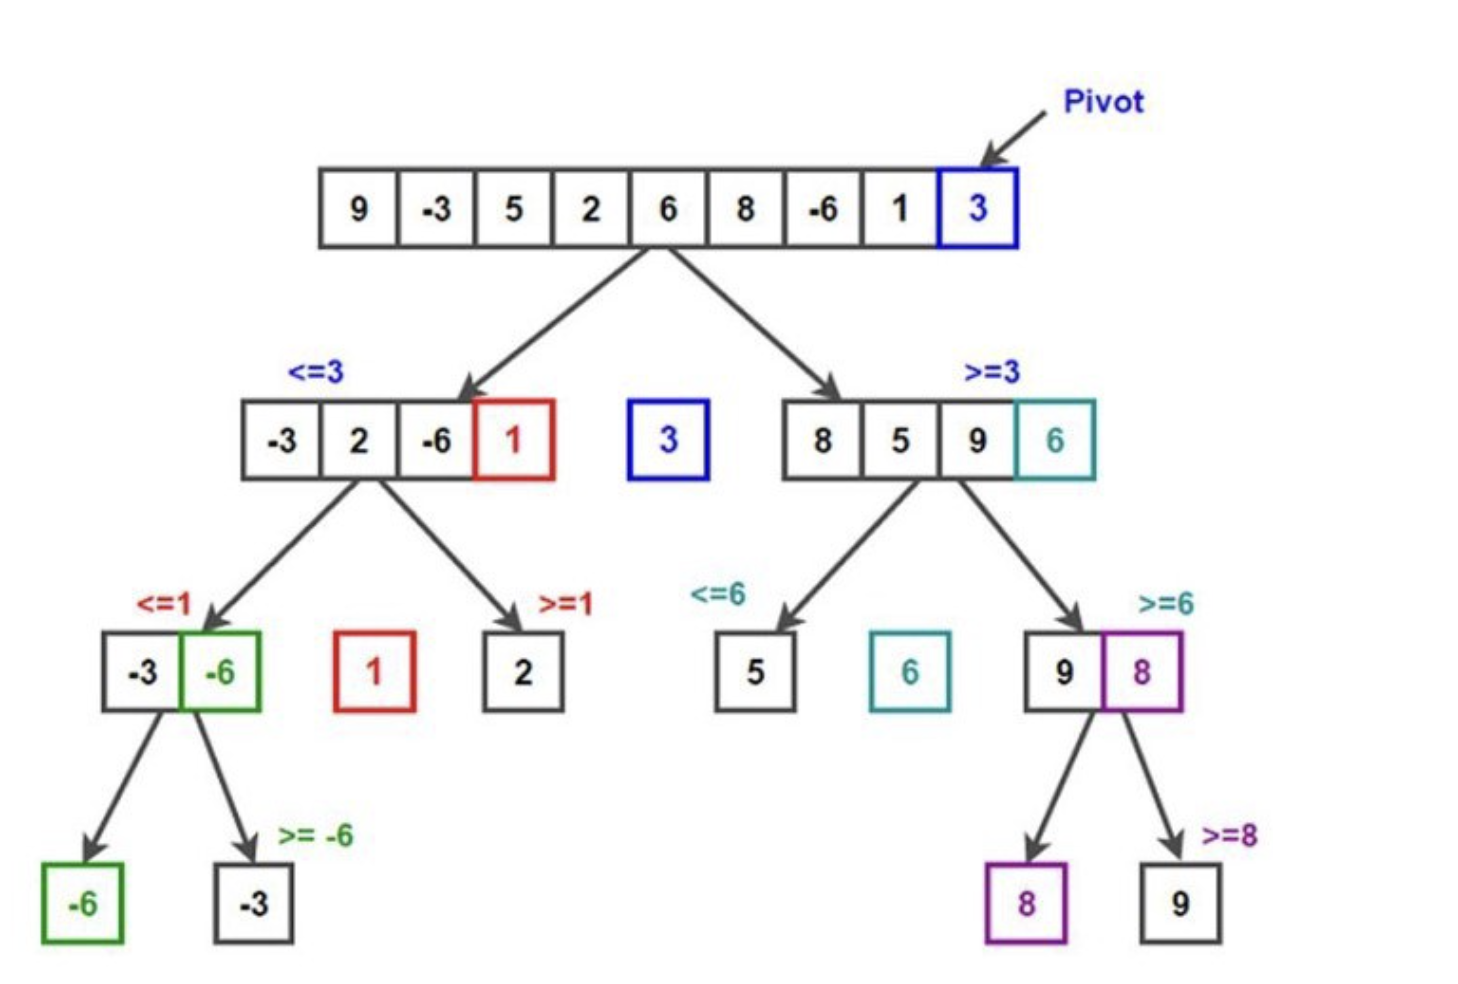

## Pivot을 하나 잡는다. ( 랜덤 )
## pivot기준 좌측에는 작은 값을 우측에는 큰 값을 둔다.
## 이를 반복한다.

In [1]:
def quick_sort(lst):
    if len(lst) <= 1:
        return lst
    pivot = lst[len[lst]//2]
    less_lst, equal_lst, greater_lst = [],[],[]
    for num in lst:
        if num < pivot:
            lesser_lst.append(num)
        elif num > pivot:
            greater_lst.append(num)
        else:
            equal_lst.append(num)
    return quick_sort(less_lst) + equal_lst + quick_sort(greater_lst)

In [2]:
def quick_sort2(node,first,last):
    def partition(first,last):
        pivot = node[last]
        left = first
        
        for right in range(first,last):
            if node[right] < pivot:
                node[left],node[right] = node[right], node[left]
                left += 1
        node[left], node[last] = node[last], node[left]
        
        return left
    
    if first < last:
        pivot = partition(first,last)
        quick_sort2(node, first, pivot -1)
        quick_sort2(node, pivot +1 ,last)
        
node = [54,26,93,17,77,31,44,55,20]
quick_sort2(node,0,8)
print(node)

[17, 20, 26, 31, 44, 54, 55, 77, 93]
